<a href="https://colab.research.google.com/github/Vicheka6363/Fruit_Classification_Using_CNN/blob/main/TrainingProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[Link for download data set(https://www.kaggle.com/datasets/moltean/fruits)]

#Importing Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

Data Preprocessing : we need


*   Validation data: is used for model training.
*   Test data: is used for model testing.
*   For model training we need training dataset and validation dataset.
* For model testing when our model is trained and we need to see whether our model is working right. we want to do some prediction then we use test data.



Training Image Preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruits-360-original-size/Training',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6240 files belonging to 24 classes.


Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruits-360-original-size/Validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3116 files belonging to 24 classes.




---



---



---


Training and Validation Image Preprocessing:
Some specific poins in Code:

*   We pass parameter " inferred" to class labels because we have many labels of dataset that are folder that store each type of fruit like apple, banana, orange ... .
*   we pass parameter " categorical" to class labels_mode because we have more than two classes ( the folder in the directory form), if we don't have any classes we paste 		    "None" for it. If we have only one class then we paste it as "int" . If we have only two classes we paste it as "Binary".
*class_names : we have assigned it as " None" since we have to cotrol all classes in order.
*color_mode: we have assigned as "rgb" that converted image as default that have 3 channel of color.
*batch_size : Size of batches of data as default :32
*image_size:(64, 64) size to resize images to after they are read from disk, specified as ` (hieght, width) `. Defaults to `(256, 256). but in the code we just assigned it to (64, 64) because we want to take only important part of the image not all the image detail.
*shuffle : whether to shuffle the data. Default: true. If it set to False, sorts the data in alphanumeric order.
*seed: optional random seed for shuffling and transformation.
*validation_split: optional flaot between 0 and 1, fraction of data to reserve for validation.
*subset: Subset of the data to return.
*interpolation: String, the interpolation method used when resizing images.

---



---




#Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=24,activation='softmax'))



---


Building Model: building convolution layer\
Convolution neural network consists of different layers: Convolutions Layer, Pooling Layer, and Fully Connected Layer.
there is a certain hyper parameter that use filters which scan the input image and do some computation and store the important feature in a separate Matrix. This process help to decrease size of image and also focus on important feature of that image.

1.   convolution layer:there is a certain hyper parameter that use filters which scan the input image and do some computation and store the important feature in a separate Matrix. This process help to decrease size of image and also focus on important feature of that image.
2.   Pooling Layer: There are two types of pooling : Max pooling and Average pooling.
		- In max pooling we scan whatever we get fro the convolution layer and try to get the maximum value from the 2 cross 2 matrix that we have and then store that maximum vlue into separate Matrix.
		- In average pooling we try to get the average value of the 2 cross 2 matrix and store it in separate matrix.

3.Fully connected layer:  is convert the 2 cross 2 matrix to a vertical manner that it's flattening the output where each input is connected to all neurons.

4.Coding Points:


*   filter = 64 : is the value that is the most recommended , that give the good result.
*   kernal_size = 3 : is the value that is working in almost neural network.
*activation fucntion: is the something that happened in convolution layer in matrix that do some computation and storing feature in a separate matrix.
* Commonly used activation fucntions: ReUL, Leaky ReUL, EUL. ReUL: Usually, the image is highly non-linear, which means varied pixel values. This is a scenario that is very difficult for an algorithm to make correct predictions. RELU activation function is applied in these cases to decrease the non-linearity and make the job easier.
*pool_size, strides = 2 : we have 2 cross 2 matrix to scan the input image.
*Dropout(0.25 or 0.5) : it is helpful to avoid underfitting and overfitting.
*Dense(units = 512): we use dense for convert matrix into neural network and A higher number of neurons can help to learn more complex patterns in the data. However, it can also make the model more complex and difficult to train.
*softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.







#Compilling and Training Phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=20)

Epoch 1/20
195/195 [==============================] - 295s 2s/step - loss: 2.3037 - accuracy: 0.2675 - val_loss: 0.7954 - val_accuracy: 0.7054
Epoch 2/20
195/195 [==============================] - 111s 566ms/step - loss: 0.7152 - accuracy: 0.7321 - val_loss: 0.3291 - val_accuracy: 0.8575
Epoch 3/20
195/195 [==============================] - 118s 603ms/step - loss: 0.4367 - accuracy: 0.8340 - val_loss: 0.1746 - val_accuracy: 0.9204
Epoch 4/20
195/195 [==============================] - 113s 578ms/step - loss: 0.2309 - accuracy: 0.9163 - val_loss: 0.1131 - val_accuracy: 0.9625
Epoch 5/20
195/195 [==============================] - 112s 571ms/step - loss: 0.1967 - accuracy: 0.9340 - val_loss: 0.1011 - val_accuracy: 0.9740
Epoch 6/20
195/195 [==============================] - 114s 584ms/step - loss: 0.1702 - accuracy: 0.9405 - val_loss: 0.0854 - val_accuracy: 0.9557
Epoch 7/20
195/195 [==============================] - 120s 614ms/step - loss: 0.1704 - accuracy: 0.9402 - val_loss: 0.1127 - va

#Saving Model

In [ ]:
cnn.save('trained_model.h5')  ## we save train model in to h5 file structure

recording history of trained data

In [ ]:
training_history.history

{'loss': [2.303729295730591,
  0.7151781916618347,
  0.4367083013057709,
  0.23085935413837433,
  0.1966841071844101,
  0.17018291354179382,
  0.1703886240720749,
  0.09099088609218597,
  0.12896448373794556,
  0.1105974018573761,
  0.07454158365726471,
  0.05250665545463562,
  0.08335532993078232,
  0.06706099212169647,
  0.06131099909543991,
  0.04689576476812363,
  0.09861985594034195,
  0.052716609090566635,
  0.0827028900384903,
  0.03520945832133293],
 'accuracy': [0.2674679458141327,
  0.7320512533187866,
  0.8339743614196777,
  0.9163461327552795,
  0.9339743852615356,
  0.940544843673706,
  0.9402243494987488,
  0.968910276889801,
  0.9623397588729858,
  0.9644230604171753,
  0.9772436022758484,
  0.9839743375778198,
  0.9758012890815735,
  0.9791666865348816,
  0.9809294939041138,
  0.9850961565971375,
  0.9714743494987488,
  0.9850961565971375,
  0.9748397469520569,
  0.9873397350311279],
 'val_loss': [0.7954239249229431,
  0.3291213810443878,
  0.17460109293460846,
  0.1131

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Calculating Accuracy of Model Achieved on Validation set

In [ ]:
training_history.history['val_accuracy']

[0.705391526222229,
 0.8575096130371094,
 0.9204108119010925,
 0.9624518752098083,
 0.9740051627159119,
 0.9557124376296997,
 0.9624518752098083,
 0.9900513291358948,
 0.9817073345184326,
 0.9727214574813843,
 0.9974325895309448,
 0.990693211555481,
 0.9595635533332825,
 0.9932605624198914,
 0.9887676239013672,
 0.9990372061729431,
 1.0,
 0.9971116781234741,
 0.9733632802963257,
 0.9983953833580017]

In [ ]:
# print the last one of the accuracy
print("Validation set Accuracy: {} ".format(training_history.history['val_accuracy'][-1]))

Validation set Accuracy: 0.9983953833580017 


In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 99.83953833580017 %


#Accuracy Visualization

Training Visualization

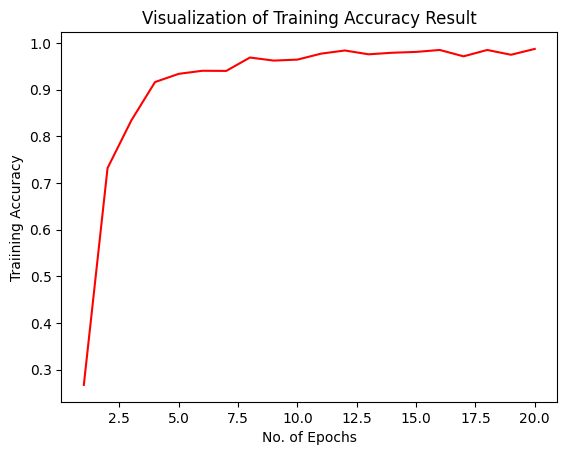

In [ ]:
#training_history.history['accuracy']
epochs = [i for i in range(1,21)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

Validation Accuracy

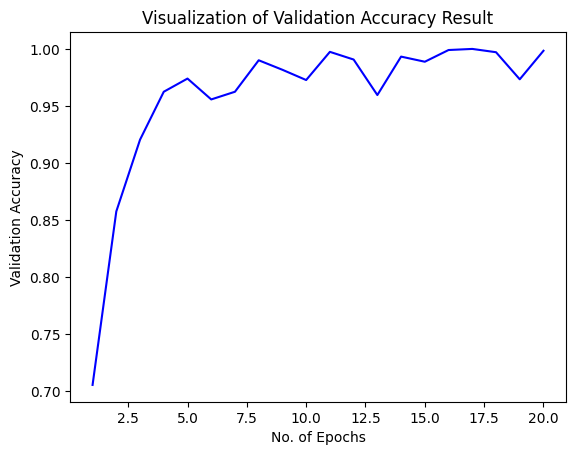

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

#Evaluating Model

Training set Accuracy

In [ ]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

195/195 [==============================] - 34s 170ms/step - loss: 0.0052 - accuracy: 0.9990
Training accuracy: 0.9990384578704834


Validation set Accuracy

In [ ]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

33/98 [=========>....................] - ETA: 12s - loss: 0.0058 - accuracy: 0.9981

#Reference

Loading image(https://keras.io/api/data_loading/image/)

Keras API:(https://keras.io/api/)

YouTube Video:(https://colab.research.google.com/drive/17kETWVFmRHi51eqZrrzhT1abUrjaH_VW#scrollTo=CKojr1SV-X76&line=1&uniqifier=1)